# Titanic - Machine Learning from Disaster

## Setup

In [19]:
import pandas as pd

train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

## Prepare data

### Exploration

In [20]:
train_df = train_data.copy(deep=True)
all_df = [train_df, test_data]

print(train_data.describe())
print(train_data.head(5))

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
   PassengerId  Survived  Pclass  \
0            1         0       3   
1        

### Completing

In [21]:
for df in all_df:
    # Complete missing age with median
    df["Age"].fillna(df["Age"].median(), inplace=True)

    # Complete embarked with most frequent value
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

    # Complete missing fare with median
    df["Fare"].fillna(df["Fare"].median(), inplace=True)

### Deleting

In [22]:
# Exclude meaningless features
train_df.drop(["PassengerId", "Cabin", "Ticket"], axis=1, inplace=True)

### Creating

In [23]:
for df in all_df:
    # Combine all family features into one
    df["Family"] = df["SibSp"] + df["Parch"] + 1

    # Create a "alone" feature
    df["IsAlone"] = 1  # init to True
    df["IsAlone"].loc[df["Family"] > 1] = 0  # update to False if needed

    # Fare & Age buckets using pandas.qcut / .cut
    df["AgeBin"] = pd.cut(df["Age"].astype(int), 5)
    df["FareBin"] = pd.qcut(df["Fare"], 4)

train_df.head(5)

C:\Users\masme\AppData\Local\Temp\ipykernel_6544\263723944.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["IsAlone"].loc[df["Family"] > 1] = 0  # update to False if needed
C:\Users\masme\AppData\Local\Temp\ipykernel_6544\263723944.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["IsAlone"].loc[df["Family"] > 1] = 0  # update to False if needed


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,IsAlone,AgeBin,FareBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,"(16.0, 32.0]","(-0.001, 7.91]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,"(32.0, 48.0]","(31.0, 512.329]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,"(16.0, 32.0]","(7.91, 14.454]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,"(32.0, 48.0]","(31.0, 512.329]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,"(32.0, 48.0]","(7.91, 14.454]"


### Convert

In [24]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for df in all_df:
    df["SexCode"] = label.fit_transform(df["Sex"])
    df["EmbarkedCode"] = label.fit_transform(df["Embarked"])
    df["AgeCode"] = label.fit_transform(df["AgeBin"])
    df["FareCode"] = label.fit_transform(df["FareBin"])

train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,IsAlone,AgeBin,FareBin,SexCode,EmbarkedCode,AgeCode,FareCode
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,"(16.0, 32.0]","(-0.001, 7.91]",1,2,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,"(32.0, 48.0]","(31.0, 512.329]",0,0,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,"(16.0, 32.0]","(7.91, 14.454]",0,2,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,"(32.0, 48.0]","(31.0, 512.329]",0,2,2,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,"(32.0, 48.0]","(7.91, 14.454]",1,2,2,1


## Prepare Model

### Features & Target

In [25]:
target = ["Survived"]
features = ["SexCode", "EmbarkedCode", "AgeCode", "FareCode", "Family", "Pclass"]

y = train_df[target]
train_X = train_df[features]
test_X = test_data[features]

### Exploratory analysis

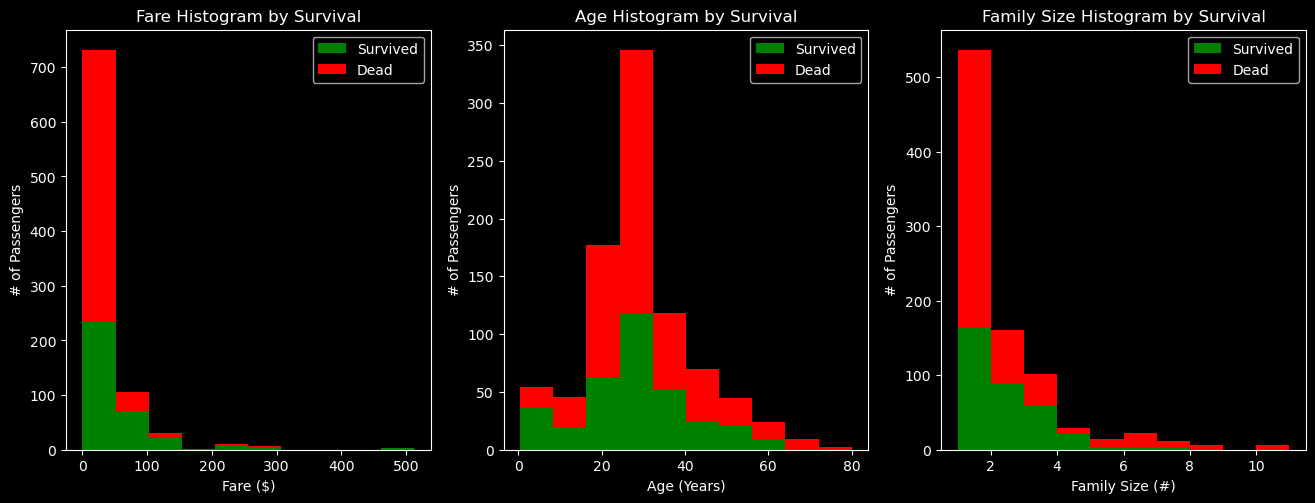

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=[16, 12])

plt.subplot(234)
plt.hist(
    x=[
        train_df[train_df["Survived"] == 1]["Fare"],
        train_df[train_df["Survived"] == 0]["Fare"],
    ],
    stacked=True,
    color=["g", "r"],
    label=["Survived", "Dead"],
)
plt.title("Fare Histogram by Survival")
plt.xlabel("Fare ($)")
plt.ylabel("# of Passengers")
plt.legend()

plt.subplot(235)
plt.hist(
    x=[
        train_df[train_df["Survived"] == 1]["Age"],
        train_df[train_df["Survived"] == 0]["Age"],
    ],
    stacked=True,
    color=["g", "r"],
    label=["Survived", "Dead"],
)
plt.title("Age Histogram by Survival")
plt.xlabel("Age (Years)")
plt.ylabel("# of Passengers")
plt.legend()

plt.subplot(236)
plt.hist(
    x=[
        train_df[train_df["Survived"] == 1]["Family"],
        train_df[train_df["Survived"] == 0]["Family"],
    ],
    stacked=True,
    color=["g", "r"],
    label=["Survived", "Dead"],
)
plt.title("Family Size Histogram by Survival")
plt.xlabel("Family Size (#)")
plt.ylabel("# of Passengers")
plt.legend()

<Axes: xlabel='Family', ylabel='Survived'>

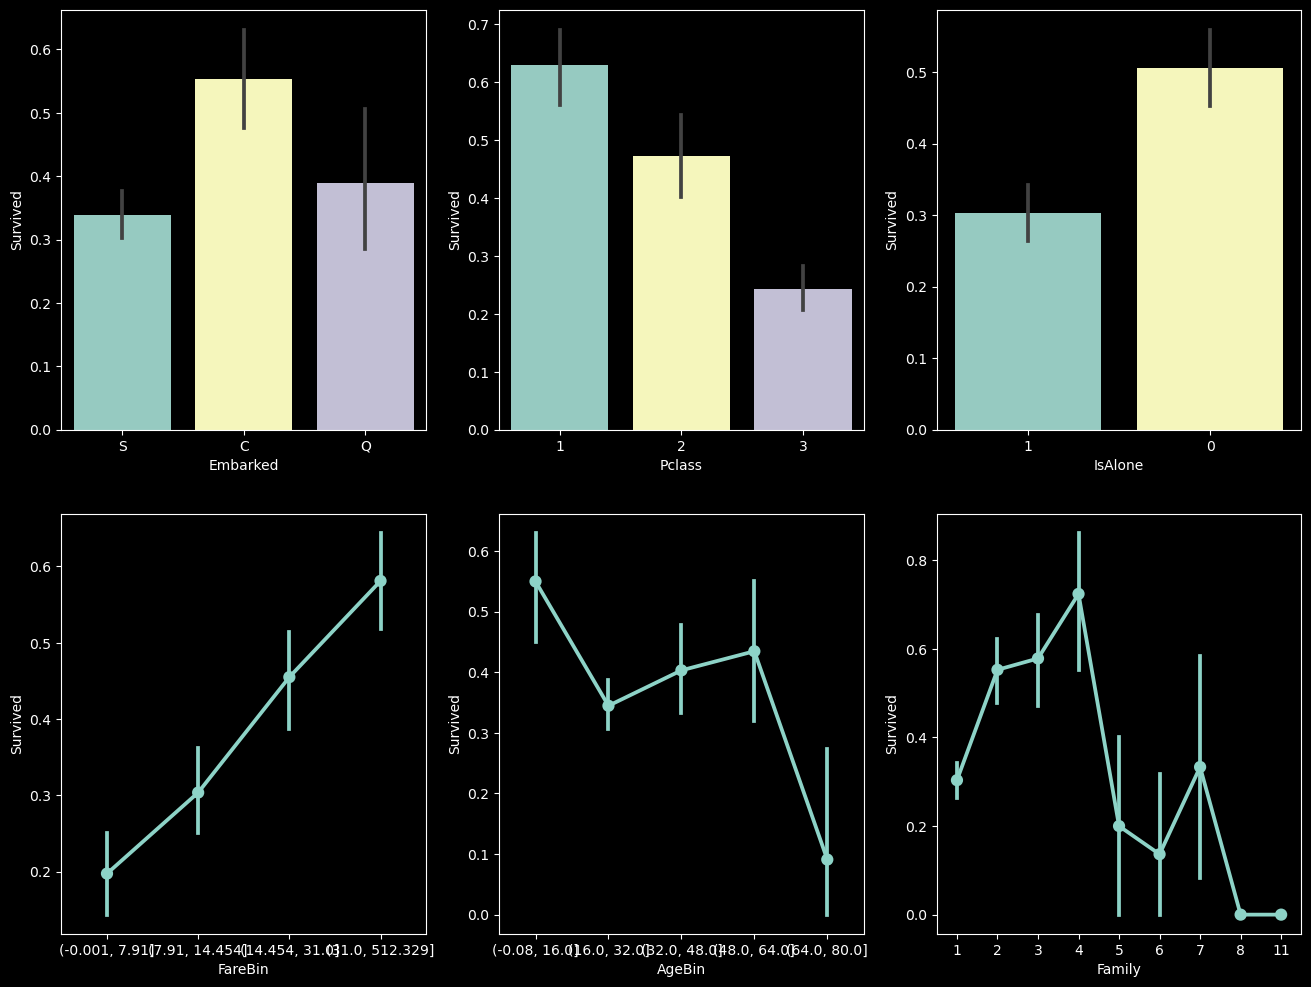

In [27]:
import seaborn as sns

fig, saxis = plt.subplots(2, 3, figsize=(16, 12))

sns.barplot(x="Embarked", y="Survived", data=train_df, ax=saxis[0, 0])
sns.barplot(x="Pclass", y="Survived", order=[1, 2, 3], data=train_df, ax=saxis[0, 1])
sns.barplot(x="IsAlone", y="Survived", order=[1, 0], data=train_df, ax=saxis[0, 2])

sns.pointplot(x="FareBin", y="Survived", data=train_df, ax=saxis[1, 0])
sns.pointplot(x="AgeBin", y="Survived", data=train_df, ax=saxis[1, 1])
sns.pointplot(x="Family", y="Survived", data=train_df, ax=saxis[1, 2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

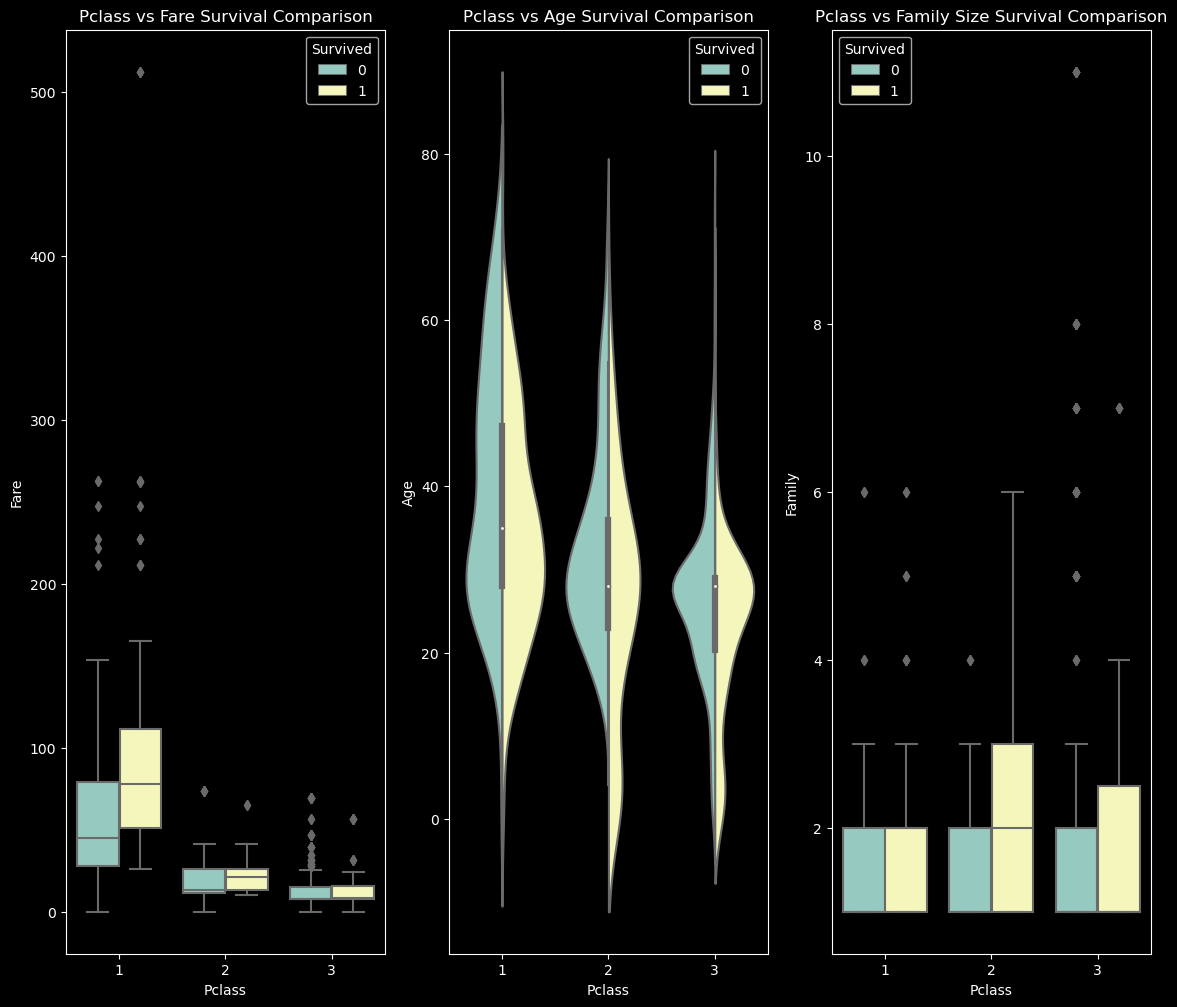

In [28]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(14, 12))

sns.boxplot(x="Pclass", y="Fare", hue="Survived", data=train_df, ax=axis1)
axis1.set_title("Pclass vs Fare Survival Comparison")

sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train_df, split=True, ax=axis2)
axis2.set_title("Pclass vs Age Survival Comparison")

sns.boxplot(x="Pclass", y="Family", hue="Survived", data=train_df, ax=axis3)
axis3.set_title("Pclass vs Family Size Survival Comparison")

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

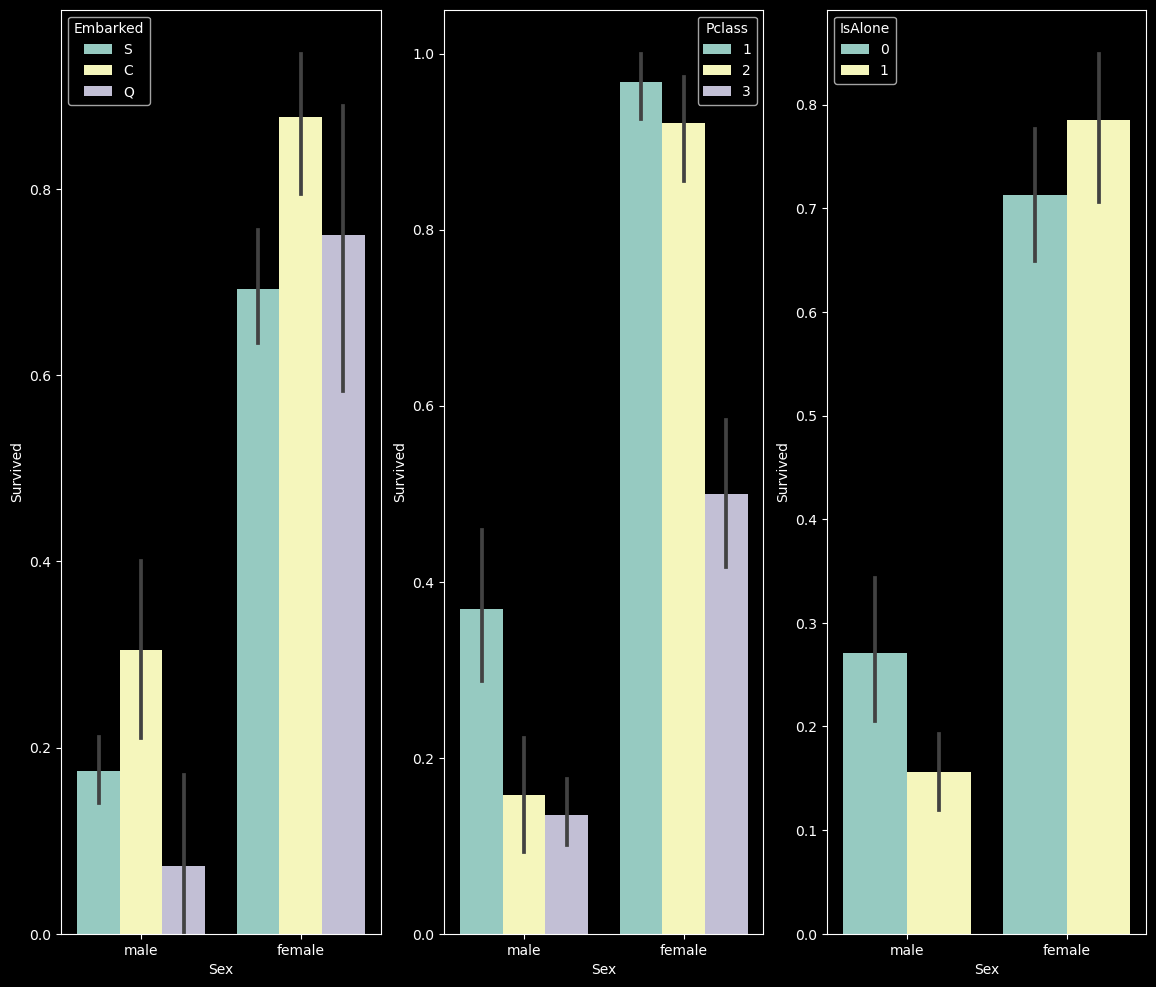

In [29]:
fig, qaxis = plt.subplots(1, 3, figsize=(14, 12))

sns.barplot(x="Sex", y="Survived", hue="Embarked", data=train_df, ax=qaxis[0])
axis1.set_title("Sex vs Embarked Survival Comparison")

sns.barplot(x="Sex", y="Survived", hue="Pclass", data=train_df, ax=qaxis[1])
axis1.set_title("Sex vs Pclass Survival Comparison")

sns.barplot(x="Sex", y="Survived", hue="IsAlone", data=train_df, ax=qaxis[2])
axis1.set_title("Sex vs IsAlone Survival Comparison")

<Axes: xlabel='Pclass', ylabel='Survived'>

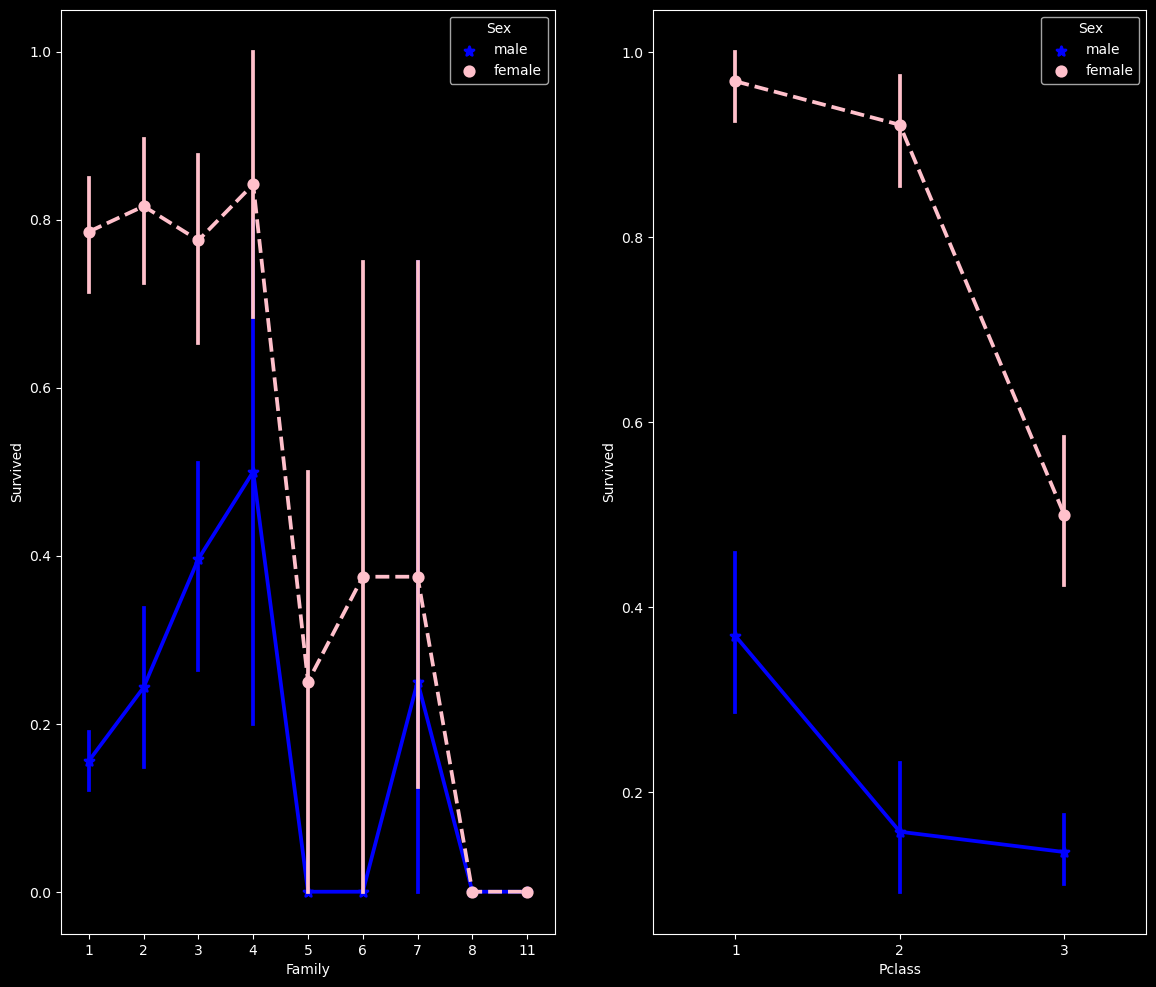

In [30]:
fig, (maxis1, maxis2) = plt.subplots(1, 2, figsize=(14, 12))

# how does family size factor with sex & survival compare
sns.pointplot(
    x="Family",
    y="Survived",
    hue="Sex",
    data=train_df,
    palette={"male": "blue", "female": "pink"},
    markers=["*", "o"],
    linestyles=["-", "--"],
    ax=maxis1,
)

# how does class factor with sex & survival compare
sns.pointplot(
    x="Pclass",
    y="Survived",
    hue="Sex",
    data=train_df,
    palette={"male": "blue", "female": "pink"},
    markers=["*", "o"],
    linestyles=["-", "--"],
    ax=maxis2,
)

c:\ProgramData\Anaconda3\envs\kaggle\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\ProgramData\Anaconda3\envs\kaggle\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


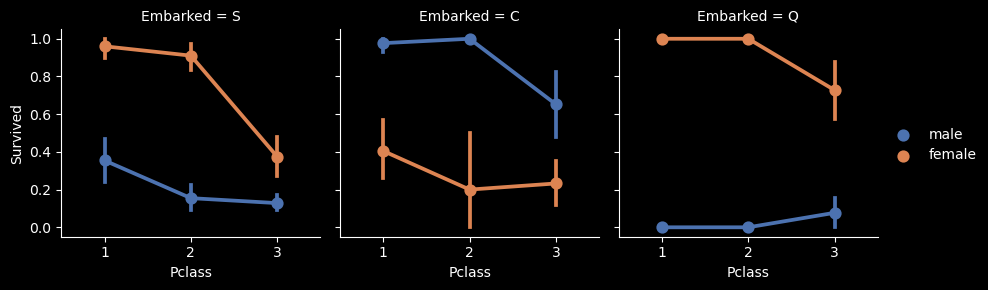

In [31]:
e = sns.FacetGrid(train_df, col="Embarked")
e.map(sns.pointplot, "Pclass", "Survived", "Sex", errorbar=("ci", 95.0), palette="deep")
e.add_legend()

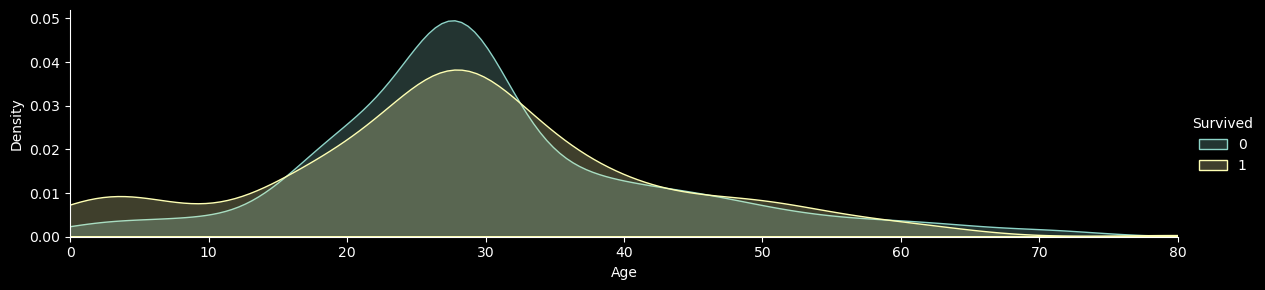

In [32]:
a = sns.FacetGrid(train_df, hue="Survived", aspect=4)
a.map(sns.kdeplot, "Age", fill=True)
a.set(xlim=(0, train_df["Age"].max()))
a.add_legend()

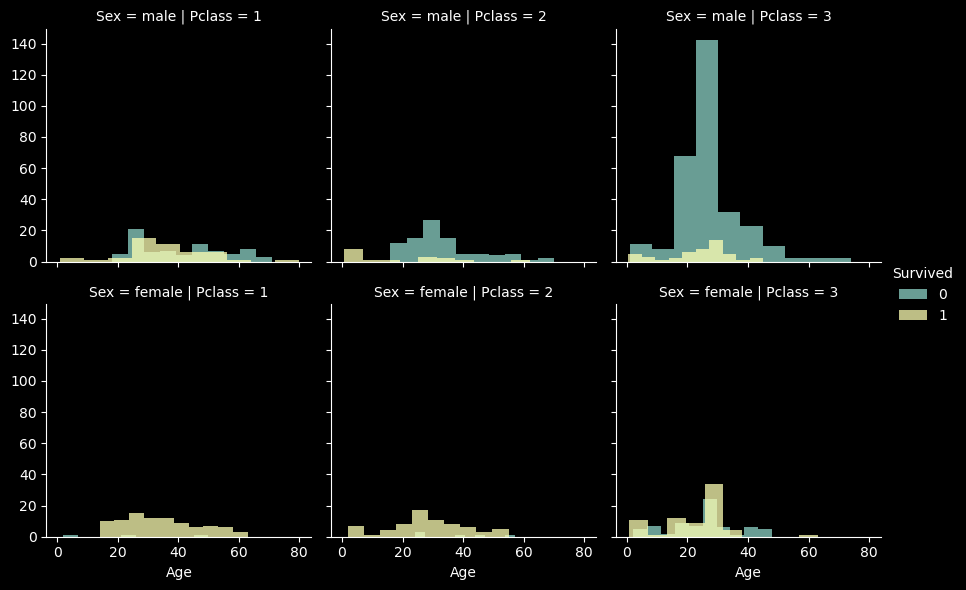

In [33]:
h = sns.FacetGrid(train_df, row="Sex", col="Pclass", hue="Survived")
h.map(plt.hist, "Age", alpha=0.75)
h.add_legend()

C:\Users\masme\AppData\Local\Temp\ipykernel_6544\1939813858.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


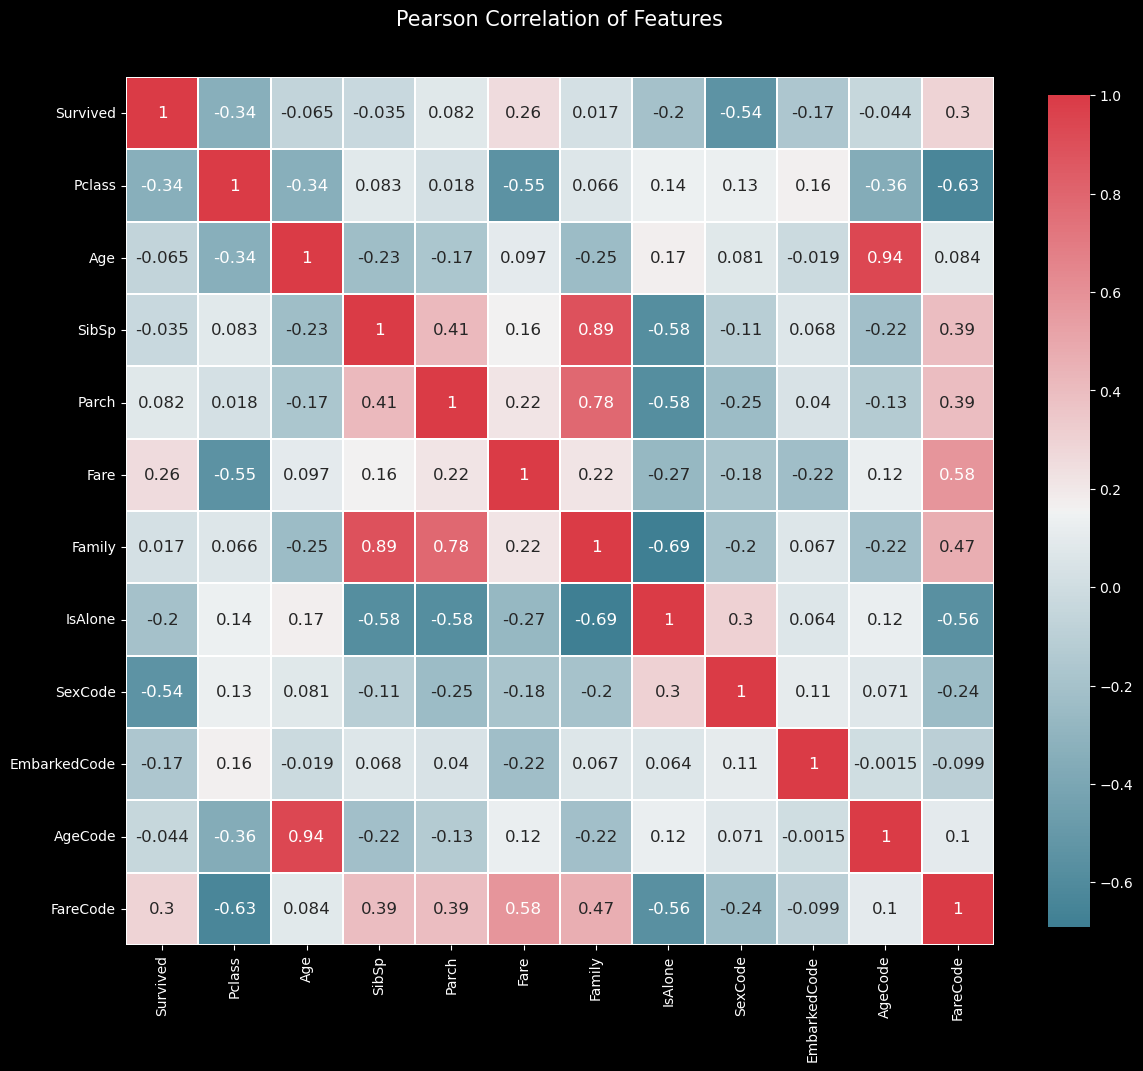

In [34]:
def correlation_heatmap(df):
    _, ax = plt.subplots(figsize=(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    _ = sns.heatmap(
        df.corr(),
        cmap=colormap,
        square=True,
        cbar_kws={"shrink": 0.9},
        ax=ax,
        annot=True,
        linewidths=0.1,
        vmax=1.0,
        linecolor="white",
        annot_kws={"fontsize": 12},
    )

    plt.title("Pearson Correlation of Features", y=1.05, size=15)


correlation_heatmap(train_df)

## Model data

### Create ML model

In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=1)

model.fit(train_df[features], train_df["Survived"])

RandomForestClassifier(random_state=1)

### Predict

In [36]:
predictions = model.predict(test_data[features])

### Save submission

In [37]:
submission = pd.DataFrame(
    {"PassengerId": test_data["PassengerId"], "Survived": predictions}
)
submission.to_csv("submission.csv", index=False)